In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teilversuch 1
### Messwerte

In [2]:
i = np.array([10.5,13.6,16.9,20.3,23.4,26.8,30.0,33.6,37.1,40.0])
u = np.array([1.288,1.276,1.257,1.238,1.220,1.199,1.174,1.143,1.115,1.123])

#der letzte Punkt macht physikalisch keinen Sinn
i = i[:-1]
u = u[:-1]

### Curve Fit

In [3]:
coeff,cov = np.polyfit(i,u,1,cov=True)

coeff_error = np.array([np.sqrt(cov[0][0]),np.sqrt(cov[1][1])])

fit = np.poly1d(coeff)
fit_graph = fit(i)

print('Innenwiderstand ≈ '+str(np.round(-coeff[0],4))+' ± '+str(np.round(coeff_error[0],4))+'Ω')
print('Leerlaufspannung ≈ '+str(np.round(coeff[1],3))+' ± '+str(np.round(coeff_error[1],3))+' V')

Innenwiderstand ≈ 0.0065 ± 0.0003Ω
Leerlaufspannung ≈ 1.366 ± 0.008 V


### Plot

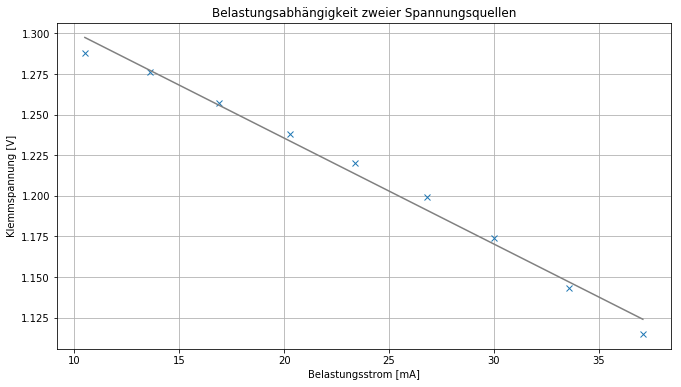

In [4]:
plt.figure(figsize=(11,6))
plt.plot(i,u,'x')
plt.plot(i,fit_graph,color = 'gray')
plt.xlabel('Belastungsstrom [mA]')
plt.ylabel('Klemmspannung [V]')
plt.title('Belastungsabhängigkeit zweier Spannungsquellen')
plt.grid(True)
plt.show()

### Rudimentäre Netzteiluntersuchung

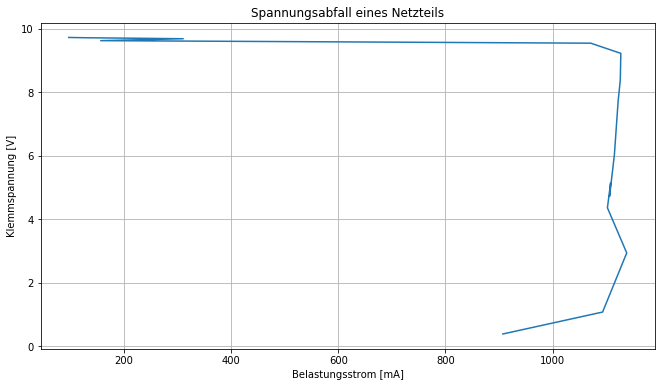

In [5]:
i = np.array([97.4,133.9,198.0,311.0,157,1071,1127,1126,1122,1118,1115,1106,1108,1102,1138,1093,907])
u = np.array([9.72,9.71,9.70,9.68,9.62,9.54,9.22,8.38,7.72,6.76,6.03,4.72,5.15,4.36,2.94,1.08,0.39])

plt.figure(figsize=(11,6))
plt.title('Spannungsabfall eines Netzteils')
plt.ylabel('Klemmspannung [V]')
plt.xlabel('Belastungsstrom [mA]')
plt.grid(True)
plt.plot(i,u)
plt.show()

Die Spannung des Netzteils wird bis zu einem gewissen Punkt nachgeregelt und nimmt fast nicht ab. Dann sackt sie allerdings rapide ab. An diesem Punkt verlieren die Messpunkte auch ihre physiklische Glaubwürdigkeit. Die galvansiche Zell ist im Gegensatz dazu natürlich nicht inder Lage ihre Spannung zu erhöhen und fällt linear ab.

# Teilversuch 2
### Messwerte

In [6]:
i = np.array([0.6,1.2,1.8,2.4,3.0,3.6,4.2,4.8,5.4,6.0])/1000
u = np.array([2.09,4.06,6.5,8.16,9.99,11.92,14.14,15.97,18.05,19.87])

### Curve Fit

In [7]:
coeff,cov = np.polyfit(i,u,1,cov=True)
slope_error = np.sqrt(cov[0][0])

print('R ≈ '+str(np.round(coeff[0],-2))+' ± '+str(np.round(slope_error,-1))+'Ω')

fit = np.poly1d(coeff)
fit_graph = fit(i)

R ≈ 3300.0 ± 30.0Ω


Selbst ohne Tolreanz stimmt unser Wert mit den Herstellerangaben überein.

In [8]:
min_coeff = coeff-np.sqrt(np.array([cov[0][0],cov[1][1]]))
max_coeff = coeff+np.sqrt(np.array([cov[0][0],cov[1][1]]))

max_fit = np.poly1d(max_coeff)
max_fit_graph = max_fit(i)

min_fit = np.poly1d(min_coeff)
min_fit_graph = min_fit(i)

### Plot

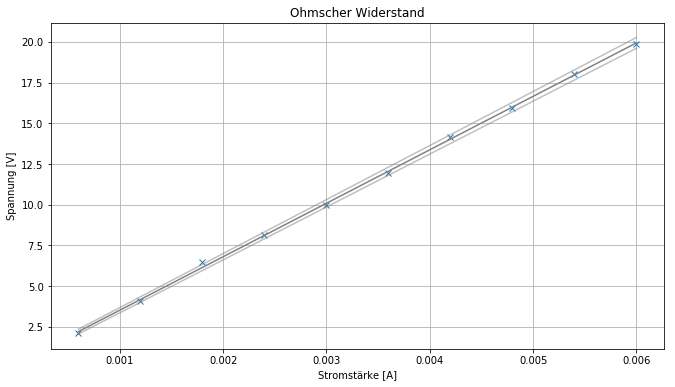

In [9]:
plt.figure(figsize = (11,6))
plt.plot(i,u,'x')
plt.plot(i,fit_graph,color = 'gray')
plt.plot(i,min_fit_graph,color = 'gray',alpha = 0.5)
plt.plot(i,max_fit_graph,color = 'gray',alpha = 0.5)
plt.title('Ohmscher Widerstand')
plt.xlabel('Stromstärke [A]')
plt.ylabel('Spannung [V]')
plt.grid(True)
plt.show()

# Teilversuch 3
### Messwerte

In [10]:
l = np.arange(0,11,1)
u = np.array([0.02,2.44,3.92,5.92,7.89,9.87,11.86,13.85,15.82,17.8,19.84])

### Plot

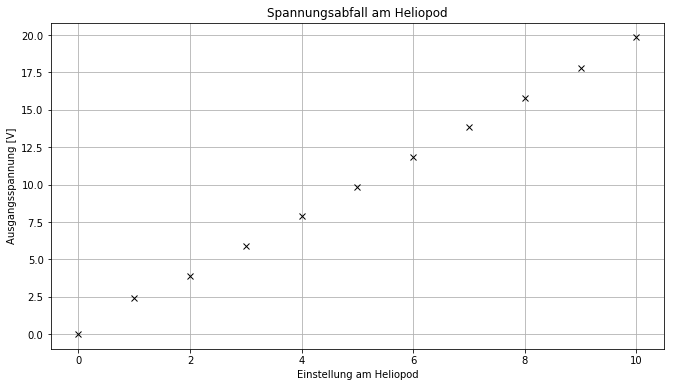

In [11]:
plt.figure(figsize = (11,6))
plt.title('Spannungsabfall am Heliopod')
plt.xlabel('Einstellung am Heliopod')
plt.ylabel('Ausgangsspannung [V]')
plt.grid(True)
plt.plot(l,u,'x',color = 'black')
plt.show()

Der Widerstand eines Leiters ist - wie uns Herr Ohm einst lehrte -  linear von der Länge des Leiters abhängig. Dies ist sowohl in 3a als auch in 3b von unseren Messungen bestätigt. 